<a href="https://colab.research.google.com/github/suumino/tensor/blob/main/chap05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


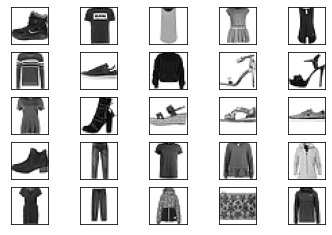

In [6]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation='softmax') 
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  

model.fit(x_train, y_train, epochs=5) 
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5307 - accuracy: 0.8122
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4023 - accuracy: 0.8554
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3676 - accuracy: 0.8665
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3467 - accuracy: 0.8729
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3321 - accuracy: 0.8787
313/313 - 0s - loss: 0.3684 - accuracy: 0.8629


[0.3684103190898895, 0.8629000186920166]

In [9]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [10]:
def print_image_summary(image, labels):

    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')

    if len(labels) == 1:
        image = image[..., np.newaxis]

    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

In [11]:
!pip install scikit_image

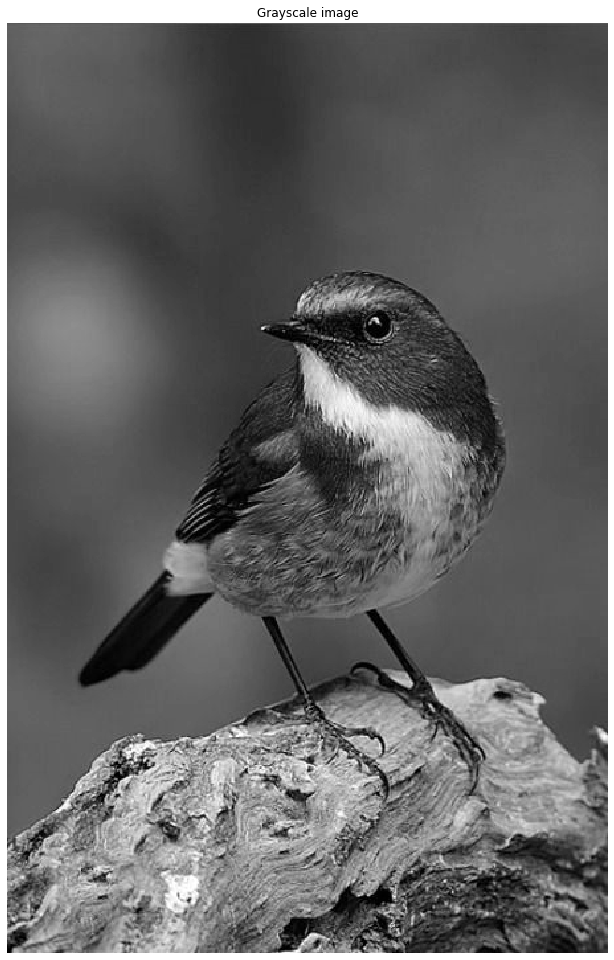

In [13]:
image_gs = imread('bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9,16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

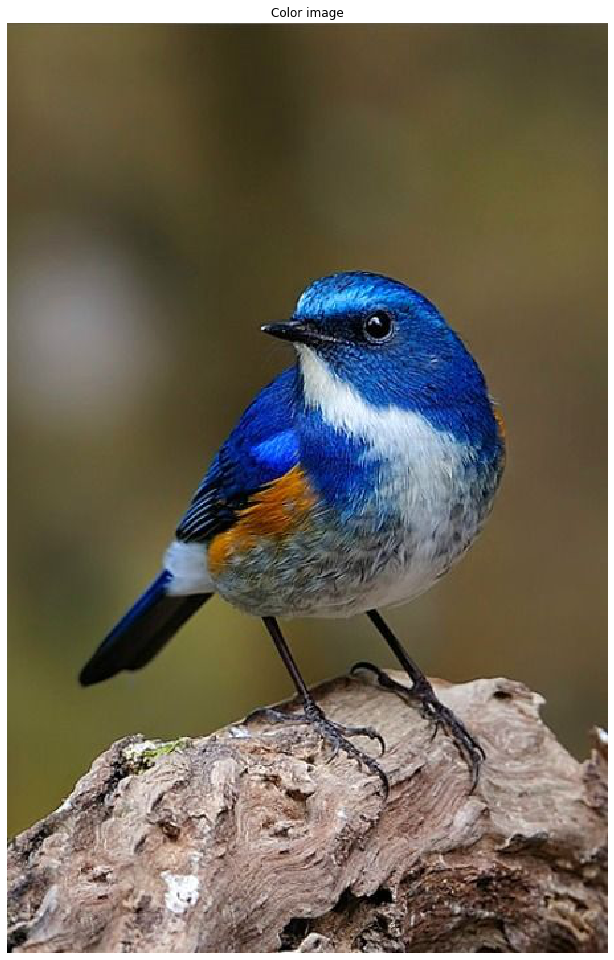

In [19]:
image_gs = imread('bird.jpg')
fig, ax = plt.subplots(figsize=(9,16))
imshow(image_gs, ax=ax)
ax.set_title('Color image')
ax.axis('off');

In [14]:
print_image_summary(image_gs, ['G'])

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


In [15]:
X_train_final = x_train.reshape((-1,28,28,1)) / 255.
X_test_final = x_test.reshape((-1,28,28,1)) / 255.

In [16]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28,28,1)), 
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])

model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [17]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 75s 40ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 2.3028 - accuracy: 0.0966
Epoch 3/5
1875/1875 [==============================] - 74s 40ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 76s 40ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 5/5
1875/1875 [==============================] - 76s 41ms/step - loss: 2.3028 - accuracy: 0.0986
313/313 - 3s - loss: 2.3026 - accuracy: 0.1000


[2.3026204109191895, 0.10000000149011612]

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
model = ResNet50(include_top=True,
                 weights="imagenet",
                 input_tensor=None,
                 input_shape=None,
                 pooling=None,
                 classes=1000)

102973440/102967424 [==============================] - 1s 0us/step


In [23]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [24]:
model.trainable = False
model = Sequential([model,
                    Dense(2, activation='sigmoid')]) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [27]:
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "train"
valid_dir = "validation"

train = ImageDataGenerator(
                 rescale=1./255,
                 rotation_range=10,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                 shear_range=0.1,
                 zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator,
                    verbose=2)

Found 385 images belonging to 3 classes.
Found 98 images belonging to 3 classes.
Epoch 1/10


InvalidArgumentError: ignored